In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
import math
%matplotlib inline

# Import Training Data

In [27]:
none1 = pd.read_csv("none1.csv")
none2 = pd.read_csv("none2.csv")
none3 = pd.read_csv("none3.csv")
none1['Class']='0'
none2['Class']='0'
none3['Class']='0'
walking1 = pd.read_csv("walking1.csv")
walking2 = pd.read_csv("walking2.csv")
walking1['Class']='1'
walking2['Class']='1'
test = pd.read_csv("test.csv")


In [28]:
# Combine Data
df = pd.concat([none1, none2,none3, walking1, walking2])
df

,E(X) LP,E(Y) LP,E(Z) LP,E(X) HP,E(Y) HP,E(Z) HP,Var HP X,Var HP Y,Var HP Z,MinMax X,MinMax Y,MinMax Z,Class
0,253.17,2039.69,142.70,87.38,0.80,-11.97,3330.57,376.19,1155.41,265.93,154.55,157.21,0
1,254.61,2039.91,142.52,88.20,0.64,-11.95,3229.35,377.95,1155.94,265.93,154.55,157.21,0
2,256.03,2040.12,142.34,87.23,0.27,-12.03,3234.68,376.96,1147.84,265.93,154.55,157.21,0
3,257.42,2040.33,142.17,84.58,0.25,-12.07,2980.88,377.41,1145.10,265.93,154.55,157.21,0
4,258.76,2040.55,141.97,81.68,0.73,-13.09,2593.79,349.34,1023.29,203.33,84.35,117.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,78.00,1761.00,561.00,-335.00,198.00,-112.00,120043.00,146102.00,121364.00,-1155.00,-732.00,-785.00,1
33,-1.00,2464.00,871.00,-236.00,-441.00,-471.00,200704.00,196391.00,108648.00,-1333.00,-1418.00,-1210.00,1
34,-243.00,1444.00,617.00,-100.00,535.00,-208.00,160755.00,213965.00,105092.00,-1175.00,-350.00,-1068.00,1
35,-310.00,2152.00,276.00,-30.00,-179.00,124.00,149082.00,194334.00,72181.00,-1113.00,-963.00,-629.00,1


In [29]:
X = df.drop(['Class'], axis=1)
y = df['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((289, 12), (124, 12))

In [92]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# instantiate the model
gnb = GaussianNB(priors=[0.99, 0.01])

# fit the model
gnb.fit(X_train, y_train)

# Test it
y_pred = gnb.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.9758
Training-set accuracy score: 0.9827


In [93]:
print(y_test.value_counts())
null_accuracy = (5/(5+3))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

0    98
1    26
Name: Class, dtype: int64
Null accuracy score: 0.6250


## Approximations

In [94]:
# precomputions
class_0_prior,class_1_prior = gnb.class_prior_[0], gnb.class_prior_[1]
theta_0, theta_1 = gnb.theta_[0, :], gnb.theta_[1, :]
var_0, var_1 = gnb.var_[0, :], gnb.var_[1, :]
jointi_0 = np.log(class_0_prior)
jointi_1 = np.log(class_1_prior)
nij_0_p = -0.5*np.sum(np.log(2.0 * np.pi * var_0)) 
nij_1_p = -0.5*np.sum(np.log(2.0 * np.pi * var_1))

## Approximations
var_0, var_1 = np.int0(var_0), np.int0(var_1)
theta_0, theta_1 = np.int0(theta_0), np.int0(theta_1)
nij_0_p = np.int0(nij_0_p)
nij_1_p = np.int0(nij_1_p)
jointi_0, jointi_1 = 0, 0

print(jointi_0, jointi_1) 
print(var_0)
print(var_1)
print(theta_0)
print(theta_1)
print(nij_0_p)
print(nij_0_p)
print("")

0 0
[     133794     1036763     1025675        4884        2725       15425
 11747214426   506672497 23217683260      235119       39715       50918]
[     120848      107584       49944       62410      107304       47121
  4399865843 15504790255  4882230592      151342      195256      151884]
[ -103   933  1004     8    -6     2 12711  2889 17488   -24   -17   -13]
[   -19   1956    479     18     10     -4 168208 269831 118371  -1077
   -994   -740]
-94
-94



In [95]:
## Test Data
walking_test = walking2.drop(['Class'], axis=1).tail(1)
none_test = none2.drop(['Class'], axis=1).tail(1)

## Approximated Math without logarithms 

- For Feature Values $0 \rightarrow n$ = $X_n$ integers
- For Class 0 (other) Variance $V_{0n}$, Theta $\Theta_{0n}$, Baseline $N_0$
- For Class 0 (other) Variance $V_{1n}$, Theta $\Theta_{1n}$, Baseline $N_1$
- With a joint distribution set to 0 each

$ N_{0ij} = N_0 - \frac{1}{2} \sum_n (X_n - \Theta_{0n})^2 / V_{0n}$ 

$ N_{1ij} = N_1 - \frac{1}{2} \sum_n (X_n - \Theta_{1n})^2 / V_{1n}$

$ P_{1L} = N_{1ij} - MAX(N_{0ij}, N_{1ij})$

$ P_1 = exp\{ P_{1L} \}$






In [96]:
def test_A(X):
    # Class 0
    n_ij_0 = np.int0(nij_0_p - 0.5*np.sum(((X - theta_0) ** 2) / (var_0), 1))

    # Class 1
    n_ij_1 = np.int0(nij_1_p - 0.5 * np.sum(((X - theta_1) ** 2) / (var_1), 1))

    p_walk_log = int(n_ij_1  - max(n_ij_1[0], n_ij_0[0]))

    p_walk = math.exp(p_walk_log)

    if (nij_0_p == np.int0(nij_0_p)):
        print("-- Approximate Result")
        
    print(f"P(Walking) = {p_walk:.2f}, P(log) = {p_walk_log:.2f}")

test_A(walking_test)
test_A(none_test)

-- Approximate Result
P(Walking) = 1.00, P(log) = 0.00
-- Approximate Result
P(Walking) = 0.00, P(log) = -47.00


In [97]:
nij_0_p_X = nij_0_p*100
nij_1_p_X = nij_1_p*100
var_0_X = np.int0(var_0 / 100)
var_1_X = np.int0(var_1 / 100)


def test_A_X(X):
    # Class 0
    n_ij_0 = np.int0(nij_0_p_X - 0.5*np.sum(((X - theta_0) ** 2) / (var_0_X), 1))

    # Class 1
    n_ij_1 = np.int0(nij_1_p_X - 0.5 * np.sum(((X - theta_1) ** 2) / (var_1_X), 1))

    p_walk_log = int(n_ij_1  - max(n_ij_1[0], n_ij_0[0]))
    if (p_walk_log > -69):
        print("Walking")

    p_walk = math.exp(p_walk_log/100)
    print(f"P(Walking) = {p_walk:.2f}, PLL(W) = {p_walk_log/100:.2f}")

test_A_X(walking_test)
test_A_X(none_test)

print(nij_0_p_X.tolist())
print(var_0_X.tolist())
print(theta_0.tolist())

print(nij_1_p_X.tolist())
print(var_1_X.tolist())
print(theta_1.tolist())

Walking
P(Walking) = 1.00, PLL(W) = 0.00
P(Walking) = 0.00, PLL(W) = -47.32
-9400
[1337, 10367, 10256, 48, 27, 154, 117472144, 5066724, 232176832, 2351, 397, 509]
[-103, 933, 1004, 8, -6, 2, 12711, 2889, 17488, -24, -17, -13]
-9600
[1208, 1075, 499, 624, 1073, 471, 43998658, 155047902, 48822305, 1513, 1952, 1518]
[-19, 1956, 479, 18, 10, -4, 168208, 269831, 118371, -1077, -994, -740]


In [98]:
y_pred_prob = gnb.predict_proba(test)
y_pred_prob

array([[4.99067133e-151, 1.00000000e+000],
       [9.99999888e-001, 1.12409810e-007],
       [9.99999999e-001, 9.47009670e-010],
       [9.99999999e-001, 6.95122459e-010],
       [9.99999999e-001, 1.40585364e-009],
       [9.89278741e-001, 1.07212592e-002],
       [1.18776717e-053, 1.00000000e+000],
       [5.86978463e-082, 1.00000000e+000],
       [2.55290062e-052, 1.00000000e+000],
       [9.58888794e-011, 1.00000000e+000],
       [8.68086572e-002, 9.13191343e-001],
       [9.57740237e-024, 1.00000000e+000],
       [8.55376401e-047, 1.00000000e+000],
       [5.68787404e-030, 1.00000000e+000],
       [2.60930596e-027, 1.00000000e+000],
       [1.91188114e-014, 1.00000000e+000],
       [7.57768422e-054, 1.00000000e+000],
       [4.81408155e-043, 1.00000000e+000],
       [2.63746238e-041, 1.00000000e+000],
       [2.38822034e-032, 1.00000000e+000],
       [3.14784810e-082, 1.00000000e+000],
       [1.26208893e-038, 1.00000000e+000],
       [1.52402237e-045, 1.00000000e+000],
       [0.0

In [99]:
def test_A_X_quiet(X):
    # Class 0
    n_ij_0 = np.int0(nij_0_p_X - 0.5*np.sum(((X - theta_0) ** 2) / (var_0_X), 1))

    # Class 1
    n_ij_1 = np.int0(nij_1_p_X - 0.5 * np.sum(((X - theta_1) ** 2) / (var_1_X), 1))

    p_walk_log = int(n_ij_1  - max(n_ij_1[0], n_ij_0[0]))
    return p_walk_log

for index, row in test.iterrows():
    x = row.to_frame()
    q = test_A_X_quiet(x.T)
    print(f"{q} -> {math.exp(q/100):0.3f} vs {y_pred_prob[index][1]:0.3f}")

0 -> 1.000 vs 1.000
-1082 -> 0.000 vs 0.000
-1564 -> 0.000 vs 0.000
-1595 -> 0.000 vs 0.000
-1524 -> 0.000 vs 0.000
0 -> 1.000 vs 0.011
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
0 -> 1.000 vs 0.913
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
0 -> 1.000 vs 1.000
-3327 -> 0.000 vs 0.000
-6339 -> 0.000 vs 0.000
-6336 -> 0.000 vs 0.000
-6320 -> 0.000 vs 0.000
-6343 -> 0.000 vs 0.000


In [91]:
walking_test

,E(X) LP,E(Y) LP,E(Z) LP,E(X) HP,E(Y) HP,E(Z) HP,Var HP X,Var HP Y,Var HP Z,MinMax X,MinMax Y,MinMax Z
36,-640,1770,653,-241,-515,486,251154,150094,318157,-1685,-1352,-397


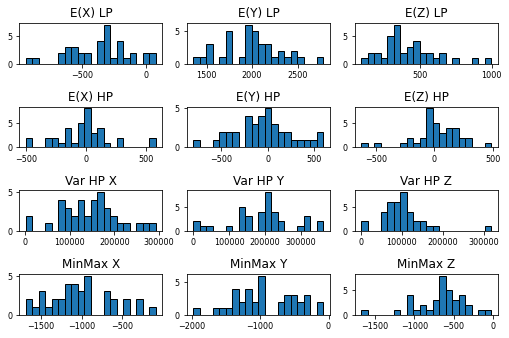

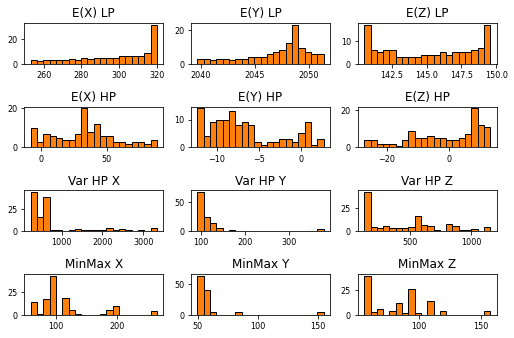

In [135]:
walking2.hist(bins=20, color='tab:blue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

none1.hist(bins=20, color='tab:orange', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

/tmp/ipykernel_14313/3900372039.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array([w[vars[i]].to_numpy(), n[vars[i]].to_numpy()])


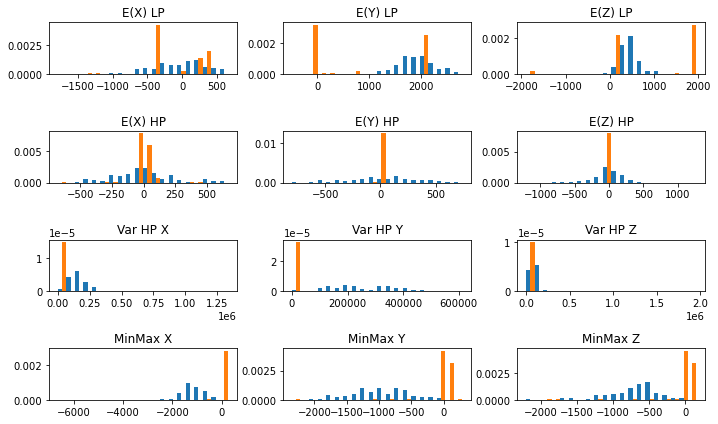

In [150]:
import numpy as np
import matplotlib.pyplot as plt

vars = ["E(X) LP","E(Y) LP","E(Z) LP","E(X) HP","E(Y) HP","E(Z) HP","Var HP X","Var HP Y","Var HP Z","MinMax X","MinMax Y","MinMax Z"]
w = pd.concat([walking1, walking2])
n = pd.concat([none1, none2])
labels = ["Walking", "None"]


n_bins = 20
colors = ['tab:blue', 'tab:orange']
ax = [None for i in range(12)]

fig, ((ax[0], ax[1], ax[2]), (ax[3], ax[4], ax[5]), (ax[6], ax[7], ax[8]), (ax[9], ax[10], ax[11])) = plt.subplots(nrows=4, ncols=3,)


for i in range(0, 12):

    x = np.array([w[vars[i]].to_numpy(), n[vars[i]].to_numpy()])
    ax[i].hist(x, n_bins, histtype='bar', density=True, rwidth=1)
    ax[i].set_title(vars[i])

fig.set_size_inches(10, 6)
plt.tight_layout()
plt.savefig("Histogram.png", transparent=False, dpi=150)
plt.show()


In [109]:
w.to_numpy()

array([109128, 512312, 454509, 358508, 406566, 273813, 283289,  91966,
       233759, 309383, 381499, 364475, 273735, 363230, 416151, 321363,
       104476, 305067, 471250, 398969, 186035, 316678, 366603, 357841,
       139197, 164754, 143485, 151202, 122188, 175515, 177298, 359767,
       392921, 375707, 136594, 312163, 336860, 323527, 358257, 187740,
       318020, 543439, 455363, 223151, 318768, 379809, 384270, 251537,
       121788, 414898, 435186, 612896, 278124, 375479, 403499, 399677,
       198791, 362917, 477797, 373372, 171284, 208952, 156849, 154317,
       229705, 219402, 197699,    605,   1297,  46978, 221240, 363215,
       156108, 208393, 196807, 311132, 240827, 210204, 360009, 315232,
       221654, 134435, 252064, 233764, 320680,  29466, 201369, 134076,
       215596, 105717, 128530, 209390, 229849, 308098, 142909, 218094,
       197703, 217839, 145617, 146102, 196391, 213965, 194334, 150094])

/tmp/ipykernel_14313/3205572889.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array([w.to_numpy(), n.to_numpy()])


In [30]:
class pair(object):
    def __init__(self, a, b) -> None:
        self.a = a
        self.b = b

    def __repr__(self) -> str:
        return f"a: {self.a}, b: {self.b}"
    
    def __add__(self, other):
        return pair(self.a + other.a, self.b + other.b)
    

pair_one = pair(1,100)
pair_two = pair(3,400)




a: 1, b: 100
a: 3, b: 400
a: 1, b: 100
a:2, b:400
a:7, b:400
